In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from lstm_model import build_model, train_model, save_lstm_model, load_lstm_model
from models.lstm_v2.lstm_normalize import get_lstm_data
from utils.chart import config_chart, plot_model_performance, plot_scatter_data, plot_distribution_data, plot_direction_comparison
from constants import SP500_TICKER
# import tensorflow as tf


---

## For **build_model** function

In [3]:
model = build_model()
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18432     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 21057 (82.25 KB)
Trainable params: 21057 (82.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---

## For **train_model** function

In [4]:
train, test, predict= get_lstm_data(SP500_TICKER)

x_train = train["x"] 
y_train = train["y"]

x_test = test["x"]
y_test = test["y"]

x_predict = predict["x"]
y_predict = predict["y"]


print("Train data:")
print(x_train[0])
print(x_train.shape)
print(y_train[0])
print(y_train.shape)

print("Test data:")
print(y_test[0])
print(x_test.shape)
print(x_test[0])
print(x_test.shape)

print("Predict data:")
print(x_predict[0])
print(x_predict.shape)
print(y_predict[0])
print(y_predict.shape)

Train data:
[[0.167 0.163 0.171 0.169 0.17  0.16  1.   ]]
(4766, 1, 7)
1.0
(4766,)
Test data:
1.0
(596, 1, 7)
[[0.524 0.517 0.534 0.535 0.527 0.511 1.   ]]
(596, 1, 7)
Predict data:
[[0.895 0.889 0.91  0.922 0.929 0.933 1.   ]]
(596, 1, 7)
1.0
(596,)


In [5]:
# plt = config_chart('Model Data')
# plt.plot(y_dates_train[:, 0], y_train[:, 0])
# plt.plot(y_dates_test[:, 0], y_test[:, 0])
# plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
# plt.legend(['Train', 'Test','Predict'])

Epoch 1/100


149/149 [==============================] - 2s 2ms/step - loss: 0.6930 - accuracy: 0.5136 - precision_1: 0.5139 - recall_1: 0.2980
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5159 - precision_1: 0.5139 - recall_1: 0.3850
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5088 - precision_1: 0.5049 - recall_1: 0.3272
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5157 - precision_1: 0.5098 - recall_1: 0.5284
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5197 - precision_1: 0.5170 - recall_1: 0.4334
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5191 - precision_1: 0.5133 - recall_1: 0.5250
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5164 - precision_1: 0.5128 - recall_1: 0.4338
Epoc

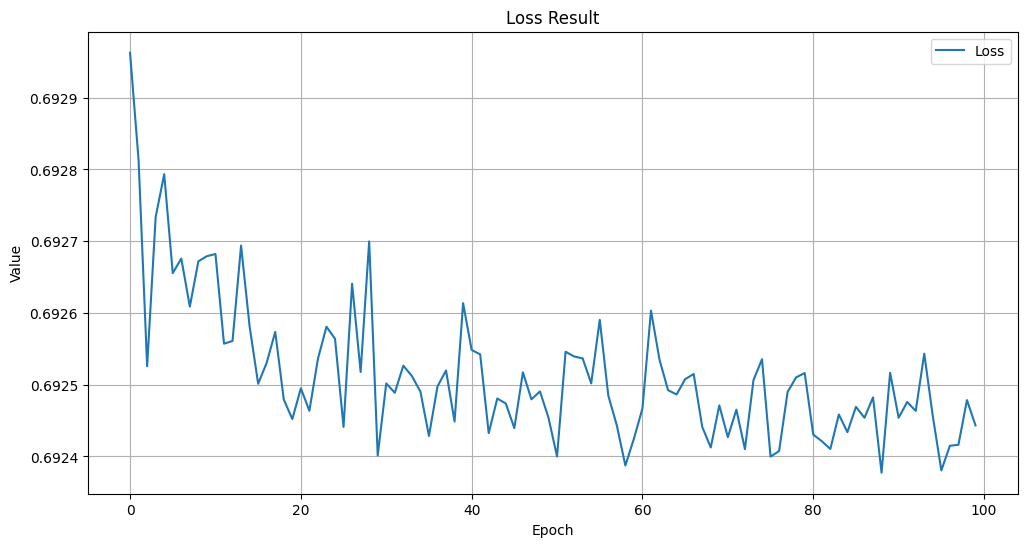

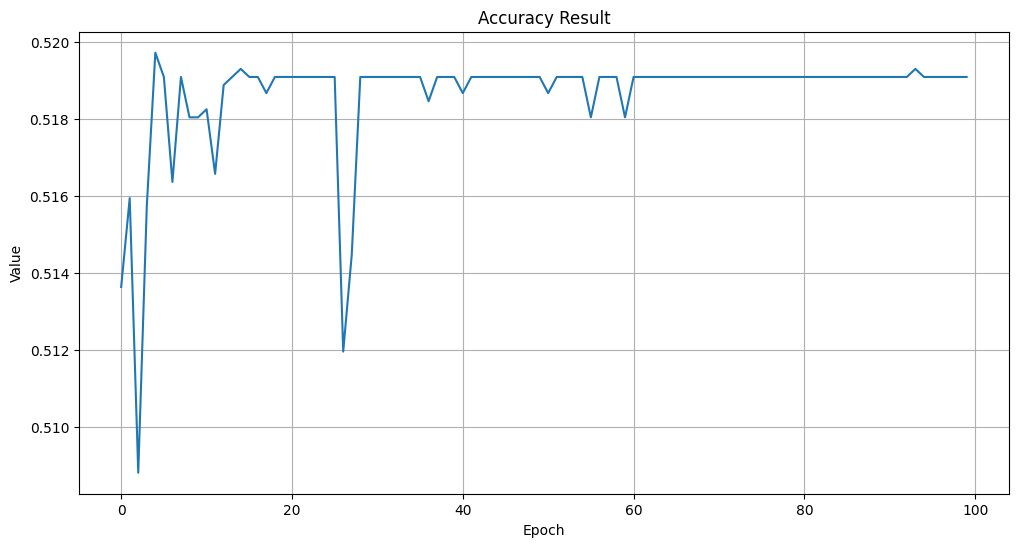

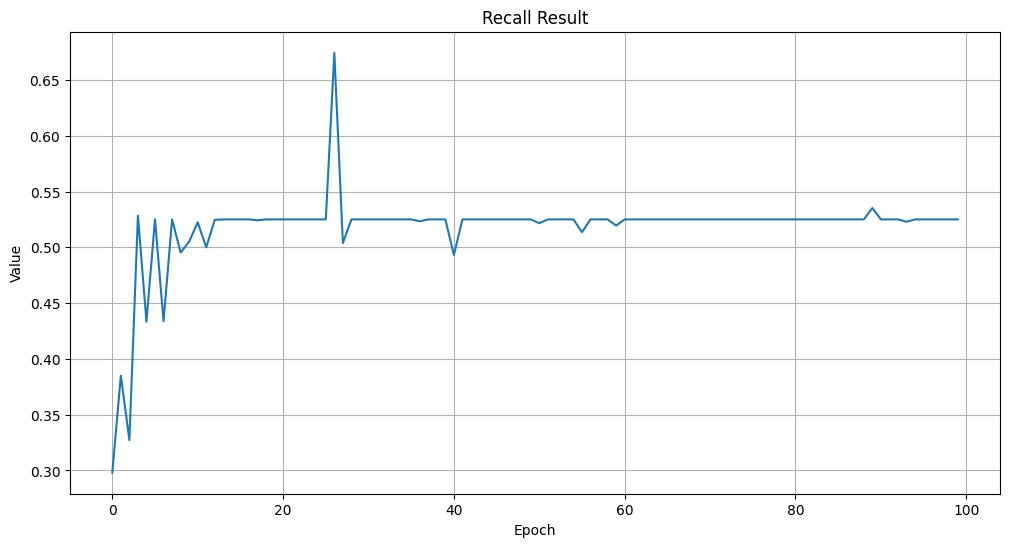

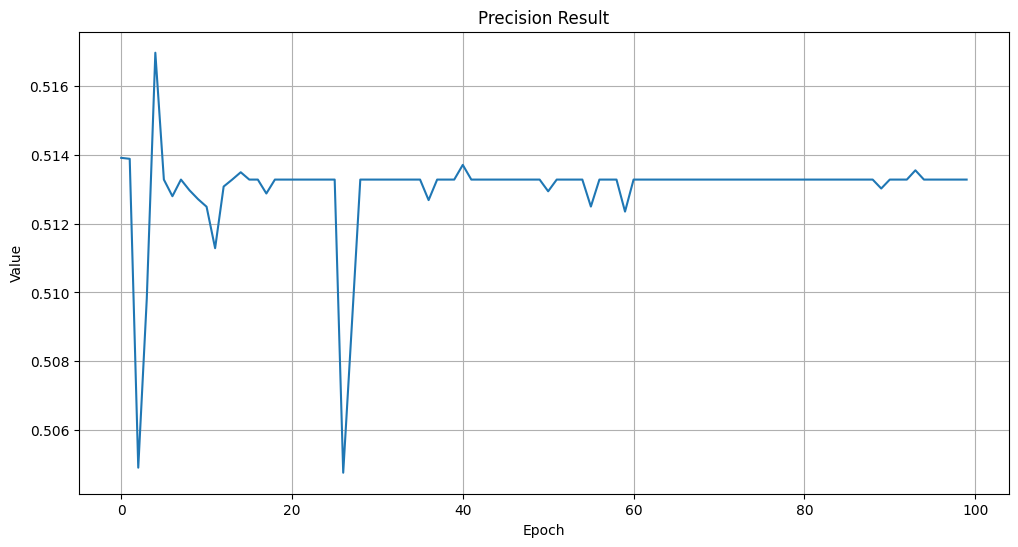

Train result:
Test result:
[0.6907871961593628, 0.5402684807777405, 0.5379310250282288, 0.5270270109176636]


In [6]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test) 

plot_model_performance(fit_result)
# plot_model_performance(evaluate_result)

print("Train result:")
print(fit_result)

print("Test result:")
print(evaluate_result)

save_lstm_model(model)

In [7]:
latest_train_metrics = [value[-1] for key, value in fit_result.history.items()]

print("Train result:")
print("accuracy, loss, precision, recall")
print(latest_train_metrics)

print("Test result:")
print("loss, accuracy, precision, recall")
print(evaluate_result)

Train result:
accuracy, loss, precision, recall
[0.6924432516098022, 0.5190935730934143, 0.5132780075073242, 0.5250424742698669]
Test result:
loss, accuracy, precision, recall
[0.6907871961593628, 0.5402684807777405, 0.5379310250282288, 0.5270270109176636]


In [8]:
model = load_lstm_model()

149/149 [==============================] - 1s 963us/step


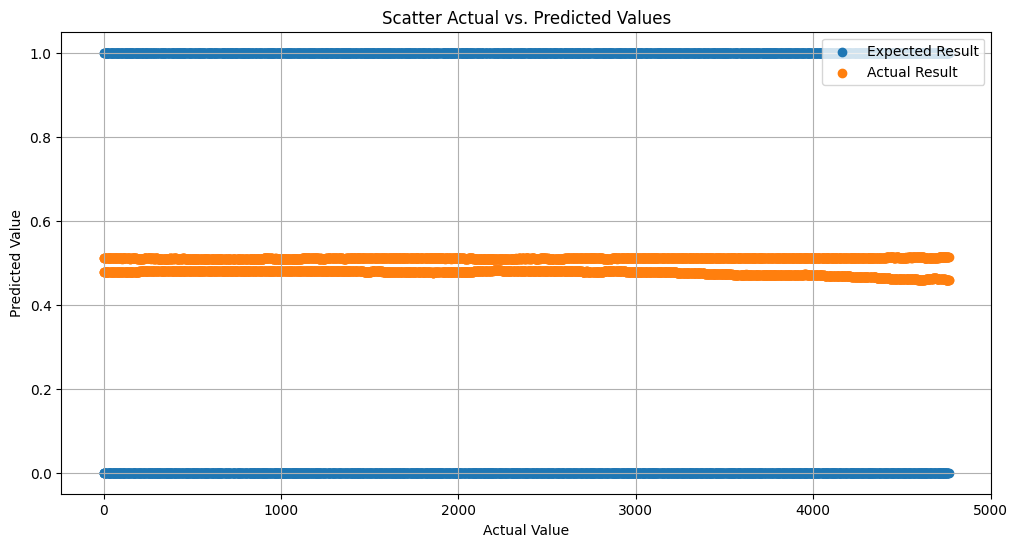

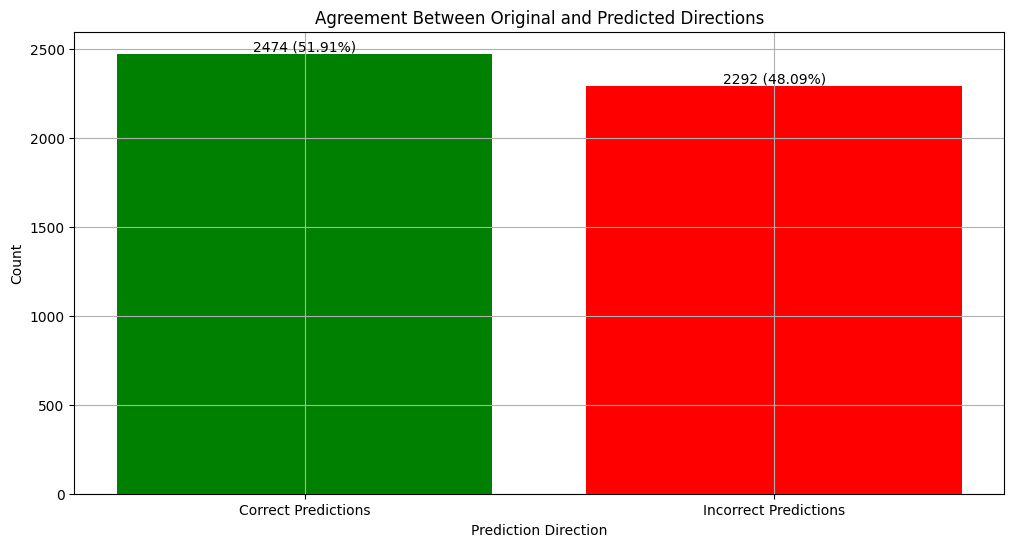

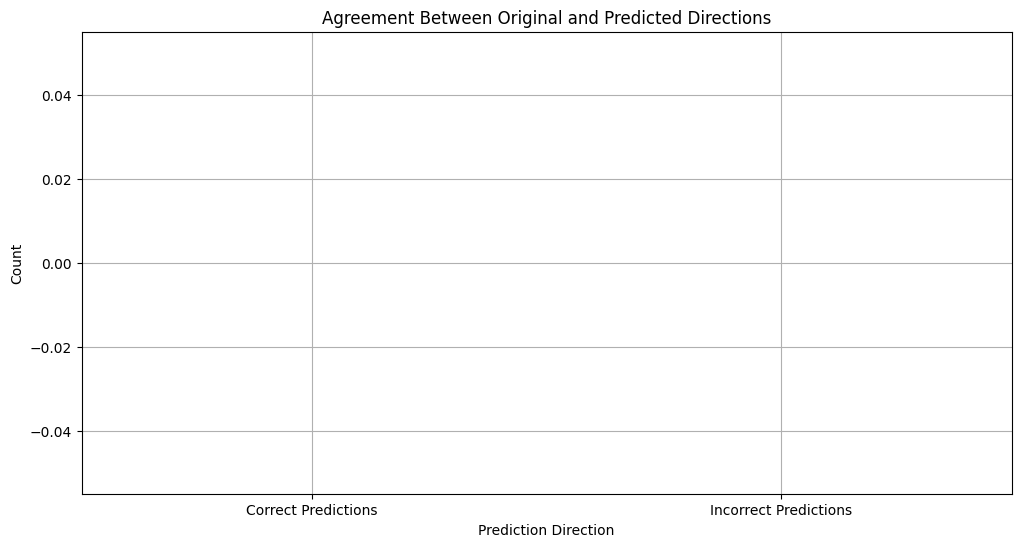

In [9]:
predictions_train = model.predict(x_train)

plot_scatter_data(y_train, predictions_train)
plot_direction_comparison(y_train, predictions_train)

19/19 [==============================] - 0s 997us/step


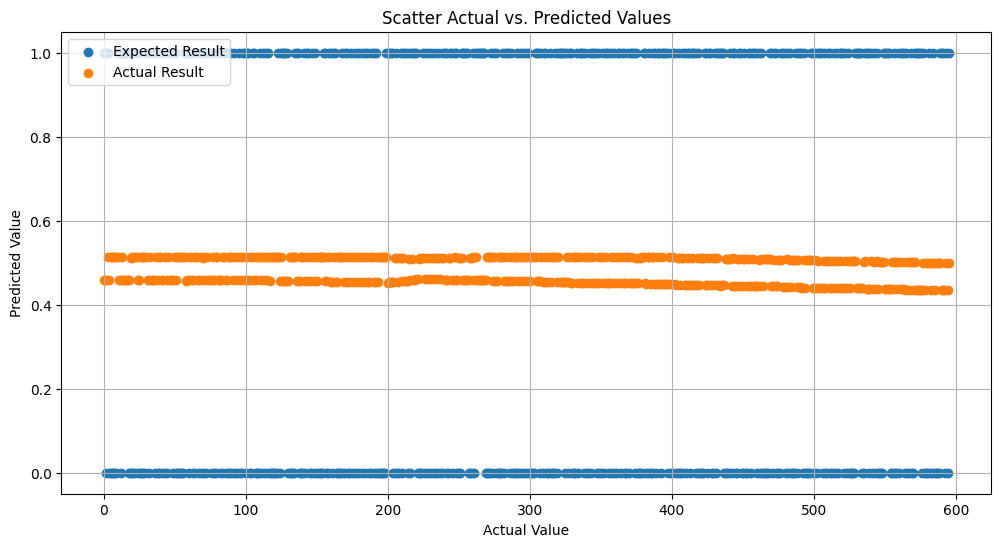

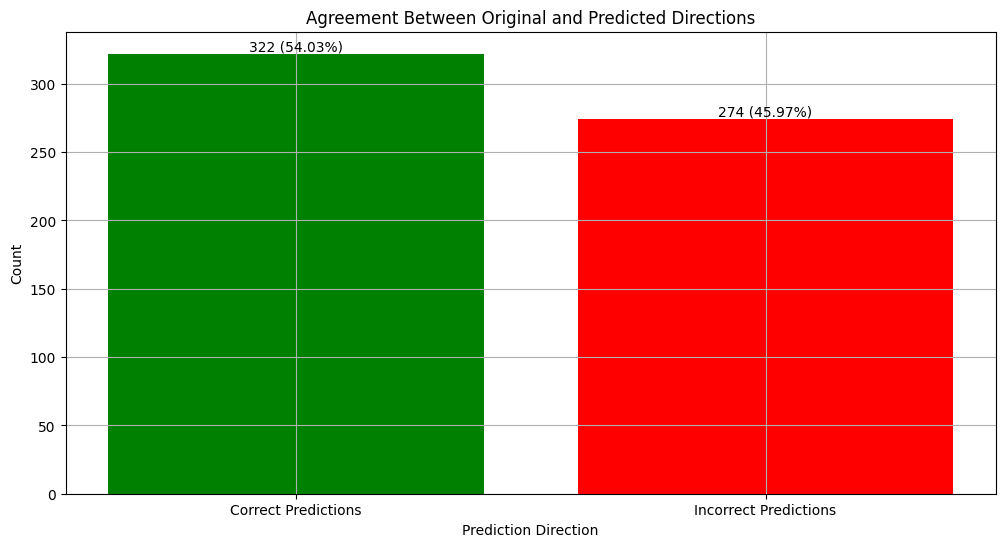

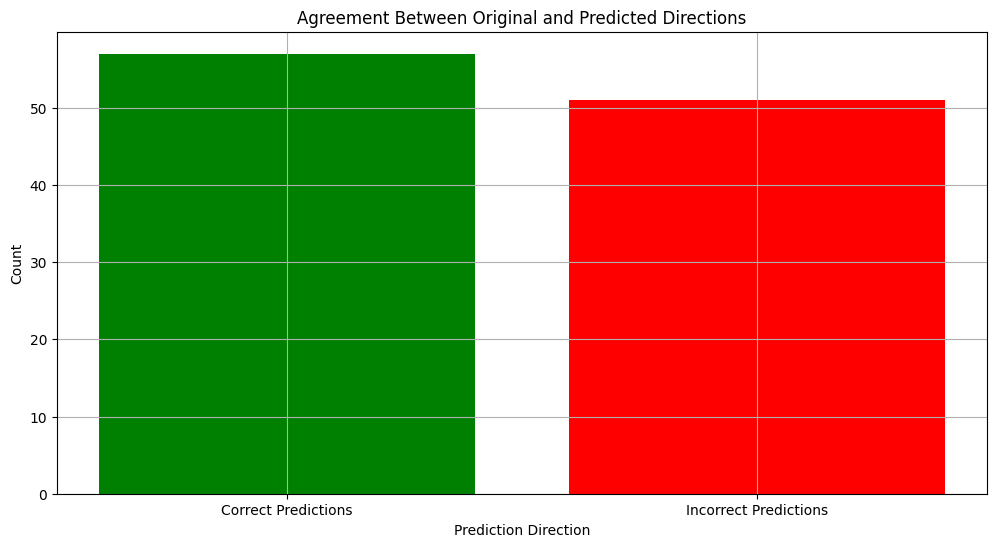

In [10]:
predictions_test = model.predict(x_test)

plot_scatter_data(y_test, predictions_test)
plot_direction_comparison(y_test, predictions_test)


19/19 [==============================] - 0s 1ms/step


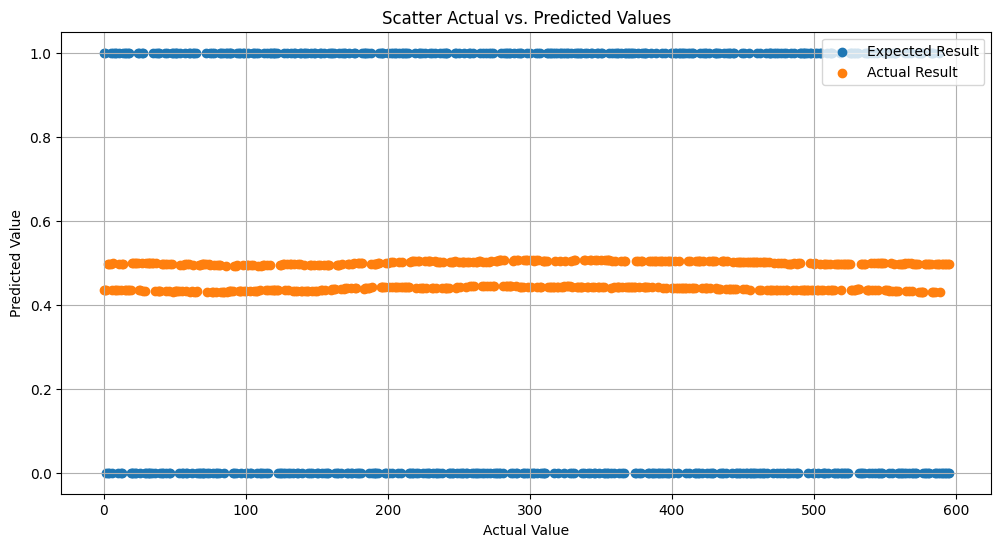

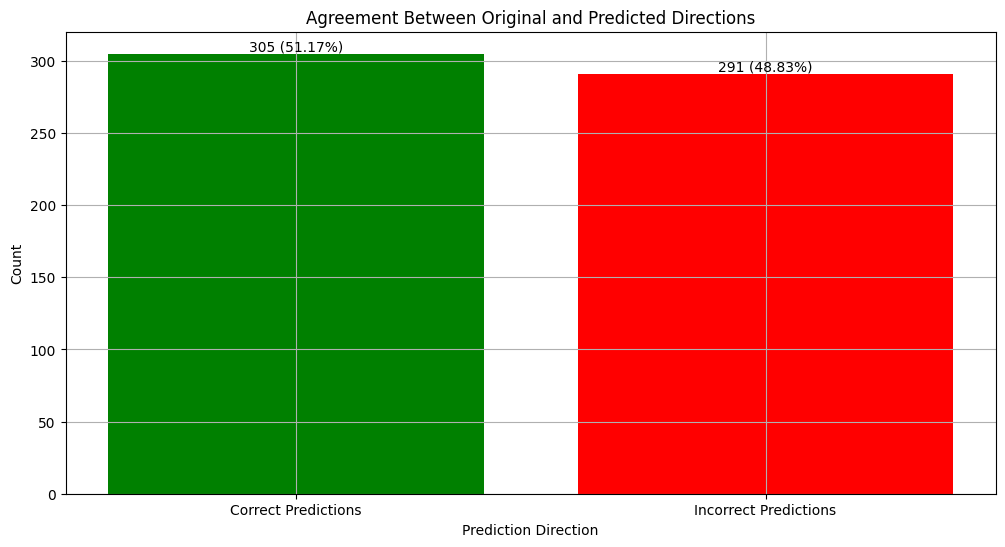

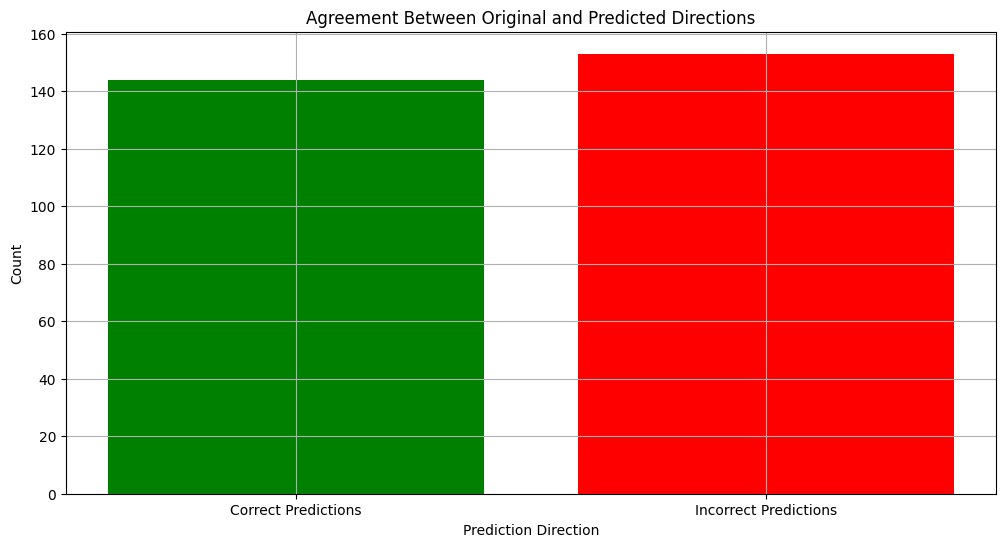

In [11]:
predictions = model.predict(x_predict)

# plt = config_chart('Predictions First Day Close Price')
# plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
# plt.plot(y_dates_predict[:, 0], predictions[:, 0])
# plt.legend(['Data', 'Predictions'])
# model
plot_scatter_data(y_predict, predictions)
plot_direction_comparison(y_predict, predictions)